In [1]:
#Importing necessary librarbies for data analysis and visualization.

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import sklearn.cluster as cluster
import scipy.optimize as opt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading csv files and making the third row as header 
gdp= pd.read_csv('GDP.csv', header= 2)
arable= pd.read_csv('arable.csv', header= 2)
mortality= pd.read_csv('mortality.csv', header= 2)
co2= pd.read_csv('co2per.csv', header= 2)

In [3]:
#Exploring the form of gdp dataframe
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,147.507808,146.910907,156.078705,182.115000,162.232750,180.087426,...,1734.938417,1712.686908,1701.765354,1546.877709,1429.596045,1571.307053,1573.221585,1527.734558,1356.699267,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,...,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,...,1965.118485,2157.481149,2178.368454,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN


In [4]:
#Defining a function to remove unnecessary columns

def remove_column(df, col1, col2, col3):
    return df.drop([col1, col2, col3], axis = 1)

In [5]:
gdp = remove_column(gdp, 'Indicator Name', 'Indicator Code', 'Country Code')
arable = remove_column(arable, 'Indicator Name', 'Indicator Code', 'Country Code')
mortality = remove_column(mortality, 'Indicator Name', 'Indicator Code', 'Country Code')
co2 = remove_column(co2, 'Indicator Name', 'Indicator Code', 'Country Code')

In [6]:
# del arable['Indicator Name']
# del arable['Indicator Code']
# del arable['Country Code']

In [7]:
# del mortality['Indicator Name']
# del mortality['Indicator Code']
# del mortality['Country Code']

In [8]:
# del co2['Indicator Name']
# del co2['Indicator Code']
# del co2['Country Code']

In [9]:
#Extracting the column names to paste it into the below function for transposition.
gdp.columns

Index(['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       'Unnamed: 65'],
      dtype='object')

In [10]:
#Making a transpose function so that we dont have to write the code again.
def transpose_dataframe(df, value):
    df=df.melt(id_vars=['Country Name'], value_vars=['1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020'], var_name='Year', value_name=f'{value}', col_level=None, ignore_index=True)
    return df

In [11]:
gdp_new = transpose_dataframe(gdp, 'gdp_per_capita' )
co2_new = transpose_dataframe(co2, 'co2_per_capita' )
arable_new = transpose_dataframe(arable, 'arable_per_capita' )
mortality_new = transpose_dataframe(mortality, 'mortality_per_1000' )

## Exploring the dataframes after transposition

In [12]:
gdp_new.head()

,Country Name,Year,gdp_per_capita
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,147.507808
2,Afghanistan,1960,59.773234
3,Africa Western and Central,1960,107.932233
4,Angola,1960,NaN


In [13]:
co2_new.head()

,Country Name,Year,co2_per_capita
0,Aruba,1960,204.631696
1,Africa Eastern and Southern,1960,0.906060
2,Afghanistan,1960,0.046057
3,Africa Western and Central,1960,0.090880
4,Angola,1960,0.100835


In [14]:
gdp_new.tail()

,Country Name,Year,gdp_per_capita
16221,Kosovo,2020,4346.637931
16222,"Yemen, Rep.",2020,NaN
16223,South Africa,2020,5655.867654
16224,Zambia,2020,985.132436
16225,Zimbabwe,2020,1214.509820


In [15]:
#Checking for null values.

gdp_new.isna().sum()

Country Name         0
Year                 0
gdp_per_capita    3390
dtype: int64

## Since there are null values, I will fill the those with country-wise mean imputation.

In [16]:
#Defining a function for mean imputation

def imputation(df, col):
    return df[col].fillna(df.groupby('Country Name')[col].transform('mean'))

In [17]:
gdp_new['gdp_per_capita']= imputation(gdp_new, 'gdp_per_capita')
co2_new['co2_per_capita']= imputation(co2_new, 'co2_per_capita')
mortality_new['mortality_per_1000']= imputation(mortality_new, 'mortality_per_1000')
arable_new['arable_per_capita']= imputation(arable_new, 'arable_per_capita')


In [18]:
# gdp_new['gdp_per_capita'] = gdp_new['gdp_per_capita'].fillna(gdp_new.groupby('Country Name')['gdp_per_capita'].transform('mean'))
# co2_new['co2_per_capita'] = co2_new['co2_per_capita'].fillna(co2_new.groupby('Country Name')['co2_per_capita'].transform('mean'))

In [19]:
# mortality_new['mortality_per_1000'] = mortality_new['mortality_per_1000'].fillna(mortality_new.groupby('Country Name')['mortality_per_1000'].transform('mean'))

In [20]:
# arable_new['arable_per_capita'] = arable_new['arable_per_capita'].fillna(arable_new.groupby('Country Name')['arable_per_capita'].transform('mean'))

In [21]:
#Checking if the null values have reduced?
gdp_new.isna().sum()

Country Name        0
Year                0
gdp_per_capita    305
dtype: int64

In [22]:
## Merging all these dataframes into one.

new_df= pd.merge(gdp_new,mortality_new,how='inner',on=['Year', 'Country Name'])
new_df1= pd.merge(new_df,co2_new,how='inner',on=['Year', 'Country Name'])
data=pd.merge(new_df1,arable_new,how='inner',on=['Year', 'Country Name'])

In [23]:
## Exploring the merged dataframe

data.sample(5)

,Country Name,Year,gdp_per_capita,mortality_per_1000,co2_per_capita,arable_per_capita
13275,Sub-Saharan Africa (IDA & IBRD countries),2009,1441.287950,105.259047,0.780112,0.224432
12228,Vanuatu,2005,1887.226576,28.500000,0.334477,0.095565
3328,Low income,1972,560.338952,122.300000,0.676152,0.451131
3339,St. Martin (French part),1972,NaN,NaN,NaN,NaN
11149,Tunisia,2001,2253.034852,27.800000,2.210556,0.283237


In [24]:
##Dropping null values from the dataframe

data.dropna(inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14274 entries, 1 to 16225
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country Name        14274 non-null  object 
 1   Year                14274 non-null  object 
 2   gdp_per_capita      14274 non-null  float64
 3   mortality_per_1000  14274 non-null  float64
 4   co2_per_capita      14274 non-null  float64
 5   arable_per_capita   14274 non-null  float64
dtypes: float64(4), object(2)
memory usage: 780.6+ KB


In [26]:
## Changing the datatypesof columns in the dataframe

data['mortality_per_1000'] = data['mortality_per_1000'].astype(float)
data['gdp_per_capita'] = data['gdp_per_capita'].astype(float)
data['co2_per_capita'] = data['co2_per_capita'].astype(float)

data['arable_per_capita'] = data['arable_per_capita'].astype(float)
data['Year']=data['Year'].astype(int)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14274 entries, 1 to 16225
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country Name        14274 non-null  object 
 1   Year                14274 non-null  int32  
 2   gdp_per_capita      14274 non-null  float64
 3   mortality_per_1000  14274 non-null  float64
 4   co2_per_capita      14274 non-null  float64
 5   arable_per_capita   14274 non-null  float64
dtypes: float64(4), int32(1), object(1)
memory usage: 724.9+ KB


In [28]:
data.head()

,Country Name,Year,gdp_per_capita,mortality_per_1000,co2_per_capita,arable_per_capita
1,Africa Eastern and Southern,1960,147.507808,153.216310,0.906060,0.288737
2,Afghanistan,1960,59.773234,186.848276,0.046057,0.514591
3,Africa Western and Central,1960,107.932233,192.181742,0.090880,0.400863
4,Angola,1960,1926.375416,177.230000,0.100835,0.294784
5,Albania,1960,2338.374773,34.161905,1.258195,0.211435


## Considering the recent values in the dataframe, i.e. the year 2020

In [29]:
other_df= data[data['Year'] == 2020]
other_df.sample(5)

,Country Name,Year,gdp_per_capita,mortality_per_1000,co2_per_capita,arable_per_capita
16003,"Congo, Dem. Rep.",2020,543.950393,170.456863,0.087264,0.218970
16101,Lesotho,2020,875.353433,123.223333,0.965355,0.227654
16045,Guinea,2020,1194.037865,223.621667,0.190247,0.516049
16186,Seychelles,2020,10764.420422,35.608333,3.427234,0.013620
16061,Hungary,2020,15980.740890,21.235000,6.119870,0.472729


In [30]:
## Using the function from the lecture for the normaliation of the dataframe, since it is important for clustering.

def norm(array):
    """ Returns array normalised to [0,1] """

    min_val = np.min(array)
    max_val = np.max(array)
    
    scaled = (array - min_val) / (max_val - min_val)
    
    return scaled


def norm_df(df):
    """ 
    Returns all columns of the dataframe normalised to [0,1] with the 
    exception the first (containing the names)
    Calls function norm to do the normalisation of one column, but
    doing all in one function is also fine. 
    """
    
    # iterate over all columns
    for col in df.columns[2:]:     # excluding the first column
        df[col] = norm(df[col])
        
    return df

In [31]:
df_norm=  norm_df(other_df)
print(df_norm.describe())


         Year  gdp_per_capita  mortality_per_1000  co2_per_capita  \
count   234.0      234.000000          234.000000      234.000000   
mean   2020.0        0.105335            0.268908        0.089441   
std       0.0        0.153574            0.236012        0.123787   
min    2020.0        0.000000            0.000000        0.000000   
25%    2020.0        0.013736            0.086905        0.012519   
50%    2020.0        0.040767            0.189842        0.044030   
75%    2020.0        0.117153            0.427927        0.128384   
max    2020.0        1.000000            1.000000        1.000000   

       arable_per_capita  
count         234.000000  
mean            0.147350  
std             0.129786  
min             0.000000  
25%             0.064635  
50%             0.123768  
75%             0.183028  
max             1.000000  


<ipython-input-30-bdc457f01d40>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = norm(df[col])


In [32]:
df_norm.shape

(234, 6)

In [33]:
## Checking the normalized dataframe.
df_norm.sample(5)

,Country Name,Year,gdp_per_capita,mortality_per_1000,co2_per_capita,arable_per_capita
16115,Marshall Islands,2020,0.033607,0.211167,0.046401,0.014410
16155,Paraguay,2020,0.041132,0.178876,0.011276,0.266489
16003,"Congo, Dem. Rep.",2020,0.002634,0.660578,0.001209,0.114788
15986,Belize,2020,0.033480,0.153563,0.032834,0.150361
15970,Armenia,2020,0.034783,0.138515,0.038909,0.077543


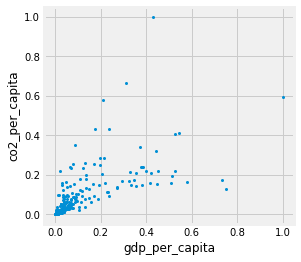

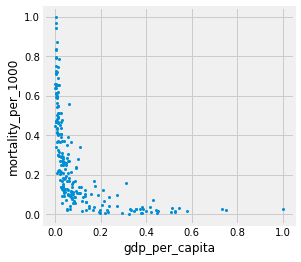

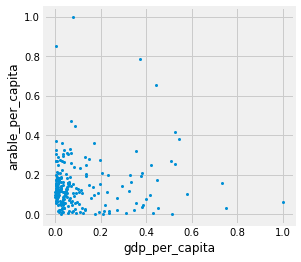

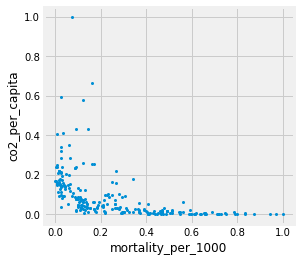

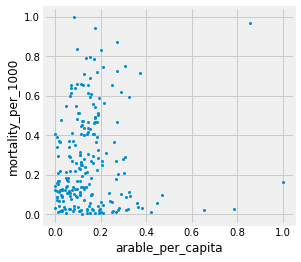

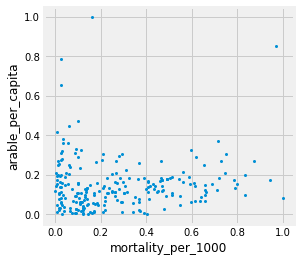

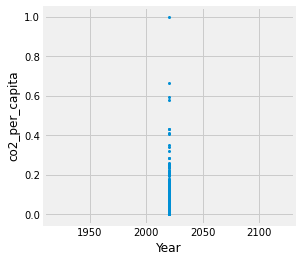

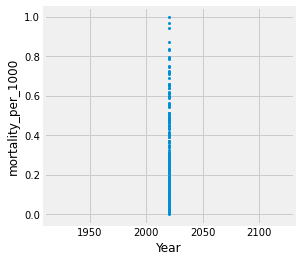

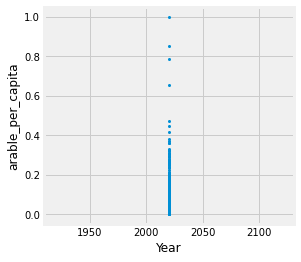

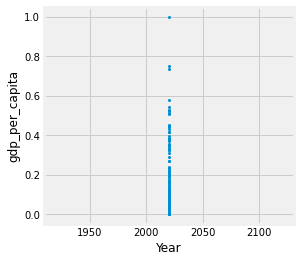

In [34]:
## Making use of the plot function from the lecture assignment, in which the plot of two column is made. 
## We have to look for those, which are giving proper clusters.

def makeplot(df, col1, col2):
    """
    Produces a square plot of two columns of dataframe df using small circle 
    symbols.
    """
    
    plt.figure(figsize=(4,4))
    plt.plot(df[col1], df[col2], "o", markersize=2)
    
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()
    
    
# exploratory plots
makeplot(df_norm, "gdp_per_capita", "co2_per_capita")
makeplot(df_norm, "gdp_per_capita", "mortality_per_1000")
makeplot(df_norm, "gdp_per_capita", "arable_per_capita")

makeplot(df_norm, "mortality_per_1000", "co2_per_capita")
makeplot(df_norm, "arable_per_capita", "mortality_per_1000")
makeplot(df_norm, "mortality_per_1000", "arable_per_capita")

makeplot(df_norm, "Year", "co2_per_capita")
makeplot(df_norm, "Year", "mortality_per_1000")
makeplot(df_norm, "Year", "arable_per_capita")
makeplot(df_norm, "Year", "gdp_per_capita")

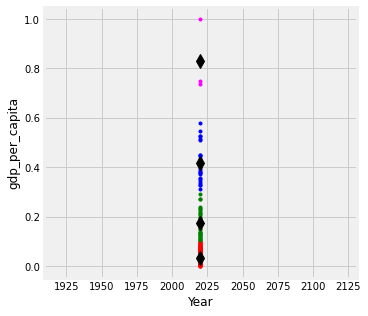

In [35]:
## By looking at the above, we see that the data can be divided into 4 clusters. 
## The Year and gdp_per_capita are giving proper cluster.
## So applying the K-means clustering

kmeans_cluster = cluster.KMeans(n_clusters=4)

# extract columns for fitting
df_fit = df_norm[["Year", "gdp_per_capita"]].copy()
kmeans_cluster.fit(df_fit)     

# extract labels and cluster centres
labels = kmeans_cluster.labels_
cen = kmeans_cluster.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(5,5))

colors = ["blue", "red", "green", "magenta"]
for l in range(4):     # loop over the different labels
    plt.plot(df_fit["Year"][labels==l], df_fit["gdp_per_capita"][labels==l], "o", markersize=3, color=colors[l])
    
# show cluster centres
for ic in range(4):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
    
plt.xlabel("Year")
plt.ylabel("gdp_per_capita")
plt.show()

In [36]:
# # First, build a model with 4 clusters

# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
# kmeans.fit(df_fit)



# print(silhouette_score(df_fit, kmeans.labels_, metric='euclidean'))

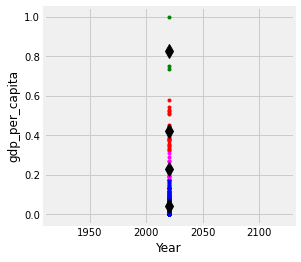

<ipython-input-37-1af8fda13d6e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm["labels"] = labels


In [37]:
## Now, setting up the agglomerative clustering for 4 clusters
agglomerative_cluster = cluster.AgglomerativeClustering(n_clusters=4)

# carry out the fitting
agglomerative_cluster.fit(df_fit)

labels = agglomerative_cluster.labels_

# The clusterer does not return cluster centres, but they are easily computed
xcen = []
ycen = []
for ic in range(4):
    xc = np.average(df_fit["Year"][labels==ic])
    yc = np.average(df_fit["gdp_per_capita"][labels==ic])
    xcen.append(xc)
    ycen.append(yc)

# plot using the labels to select colour
plt.figure(figsize=(4,4))

colors = ["blue", "red", "green", "magenta"]
for l in range(0,4):     # loop over the different labels
    plt.plot(df_fit["Year"][labels==l], df_fit["gdp_per_capita"][labels==l], "o", markersize=3, color=colors[l])
    
# show cluster centres
for ic in range(4):
    plt.plot(xcen[ic], ycen[ic], "dk", markersize=10)
    
plt.xlabel("Year")
plt.ylabel("gdp_per_capita")
plt.show()


### writing labels into the dataframe, and sorting it against labels.
df_norm["labels"] = labels
df_norm = df_norm.sort_values(["labels"], ignore_index=True)


In [38]:
df_norm.sample(5)

,Country Name,Year,gdp_per_capita,mortality_per_1000,co2_per_capita,arable_per_capita,labels
37,Least developed countries: UN classification,2020,0.007021,0.438611,0.003327,0.143292,0
50,Middle East & North Africa,2020,0.054203,0.129158,0.079652,0.127886,0
39,Sri Lanka,2020,0.029727,0.126148,0.008637,0.030123,0
79,Tajikistan,2020,0.005356,0.340144,0.012422,0.059474,0
101,Seychelles,2020,0.090912,0.120555,0.074412,0.006790,0


## Some visualizations to cross-check our labeled data of the year 2020.

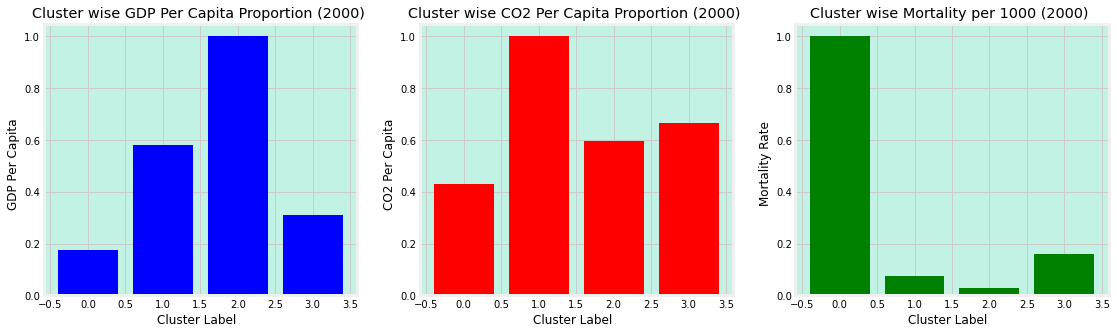

In [39]:
#Data Visualization of the Clustered Labels using Matplotlib library.

fig, ax = plt.subplots(1,3, figsize=(17,5))  #Setting the size of subplots


ax[0].bar(df_norm['labels'], df_norm['gdp_per_capita'], color='b', label='Gdp')

ax[0].set_facecolor("#c2f2e4") #Changing the background color

ax[0].set_title("Cluster wise GDP Per Capita Proportion (2000) ")
ax[0].set_xlabel("Cluster Label  ")
ax[0].set_ylabel("GDP Per Capita  ")

ax[1].bar(df_norm['labels'], df_norm['co2_per_capita'], color='r', label='Gdp')
ax[1].set_facecolor("#c2f2e4") #Changing the background color
ax[1].set_title("Cluster wise CO2 Per Capita Proportion (2000) ")
ax[1].set_xlabel("Cluster Label  ")
ax[1].set_ylabel("CO2 Per Capita  ")

ax[2].bar(df_norm['labels'], df_norm['mortality_per_1000'], color='g', label='Gdp')
ax[2].set_facecolor("#c2f2e4") #Changing the background color
ax[2].set_title("Cluster wise Mortality per 1000 (2000) ")
ax[2].set_xlabel("Cluster Label  ")
ax[2].set_ylabel("Mortality Rate  ")

plt.show()

## Checking the Countries in each cluster.

In [40]:
check= df_norm[df_norm['labels'] == 0]
check.head(10)

,Country Name,Year,gdp_per_capita,mortality_per_1000,co2_per_capita,arable_per_capita,labels
0,Africa Eastern and Southern,2020,0.009654,0.591536,0.023173,0.151480,0
1,Mali,2020,0.005385,0.942736,0.001225,0.175744,0
2,Myanmar,2020,0.010612,0.407733,0.003302,0.141202,0
3,Middle East & North Africa (excluding high inc...,2020,0.024007,0.139601,0.054228,0.134765,0
4,Montenegro,2020,0.064246,0.026267,0.038199,0.082321,0
5,Mongolia,2020,0.033012,0.291864,0.086599,0.306416,0
6,Mozambique,2020,0.001810,0.790452,0.003171,0.134360,0
7,Mauritania,2020,0.012637,0.548660,0.009841,0.091198,0
8,Mauritius,2020,0.072458,0.139283,0.030649,0.047805,0
9,Malawi,2020,0.003436,0.797106,0.001175,0.153037,0


In [41]:
## Chehcing the correlation of the dataframe,

check.corr()

,Year,gdp_per_capita,mortality_per_1000,co2_per_capita,arable_per_capita,labels
Year,NaN,NaN,NaN,NaN,NaN,NaN
gdp_per_capita,NaN,1.000000,-0.669356,0.665655,-0.025263,NaN
mortality_per_1000,NaN,-0.669356,1.000000,-0.528274,0.134853,NaN
co2_per_capita,NaN,0.665655,-0.528274,1.000000,0.200124,NaN
arable_per_capita,NaN,-0.025263,0.134853,0.200124,1.000000,NaN
labels,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
check2= df_norm[df_norm['labels'] == 1]
check2.head(10)

,Country Name,Year,gdp_per_capita,mortality_per_1000,co2_per_capita,arable_per_capita,labels
191,North America,2020,0.527728,0.010099,0.405964,0.419151,1
192,Israel,2020,0.379440,0.039800,0.149358,0.038950,1
193,Japan,2020,0.345101,0.018763,0.172693,0.021109,1
194,Singapore,2020,0.514433,0.030676,0.193298,0.000000,1
195,Netherlands,2020,0.450510,0.016940,0.219244,0.031944,1
196,Belgium,2020,0.387995,0.029548,0.241824,0.045205,1
197,OECD members,2020,0.327696,0.027577,0.216046,0.197076,1
198,New Zealand,2020,0.355882,0.029755,0.141881,0.321150,1
199,Austria,2020,0.417599,0.036169,0.159325,0.098604,1
200,Australia,2020,0.444427,0.024122,0.322392,0.652297,1


In [43]:
check3= df_norm[df_norm['labels'] == 2]
check3.head(10)

,Country Name,Year,gdp_per_capita,mortality_per_1000,co2_per_capita,arable_per_capita,labels
215,Luxembourg,2020,1.000000,0.026158,0.596273,0.064348,2
216,Switzerland,2020,0.750227,0.019897,0.127675,0.030124,2
217,Ireland,2020,0.734427,0.029475,0.176194,0.160204,2


In [44]:
check4= df_norm[df_norm['labels'] == 3]
check4.head(10)

,Country Name,Year,gdp_per_capita,mortality_per_1000,co2_per_capita,arable_per_capita,labels
218,"Korea, Rep.",2020,0.271149,0.100344,0.133428,0.024736,3
219,United Arab Emirates,2020,0.311340,0.161202,0.665942,0.009321,3
220,Andorra,2020,0.191619,0.009878,0.147855,0.012570,3
221,Kuwait,2020,0.212245,0.124139,0.577598,0.000971,3
222,Italy,2020,0.271864,0.042063,0.136261,0.084919,3
223,Spain,2020,0.231691,0.011794,0.113398,0.199587,3
224,Brunei Darussalam,2020,0.234971,0.089759,0.430055,0.009309,3
225,Malta,2020,0.238786,0.041028,0.093395,0.016459,3
226,Cyprus,2020,0.227896,0.024491,0.112554,0.113470,3
227,Czech Republic,2020,0.196010,0.008052,0.249827,0.154928,3


In [45]:
df_norm.labels.nunique()

4

## Now checking the clusters 30 years ago, let's look at 1990 values

In [46]:
other_df2= data[data['Year'] == 1990]

df_norm2=  norm_df(other_df2)

<ipython-input-30-bdc457f01d40>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = norm(df[col])


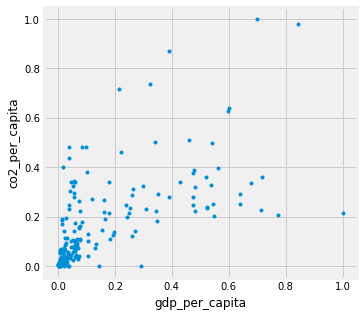

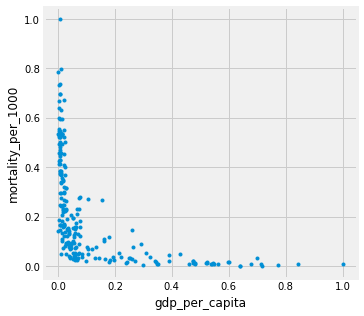

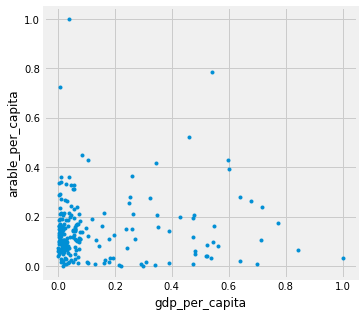

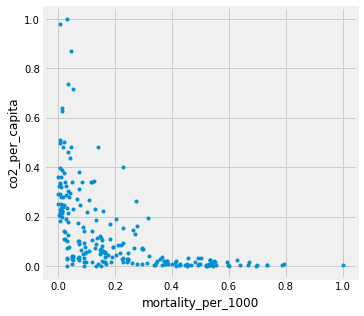

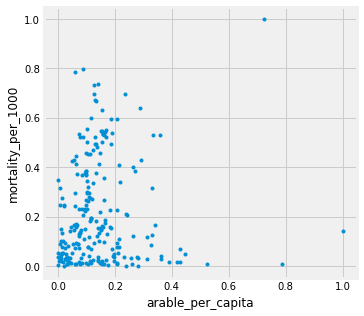

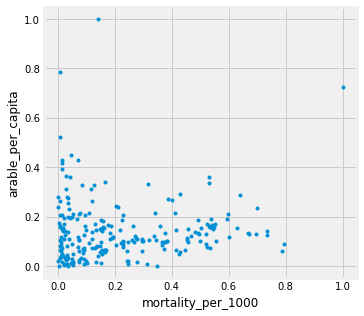

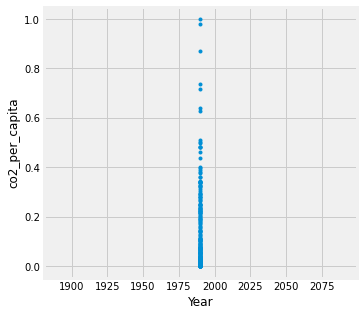

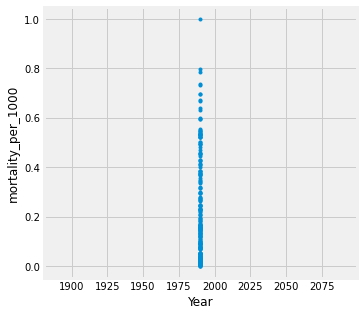

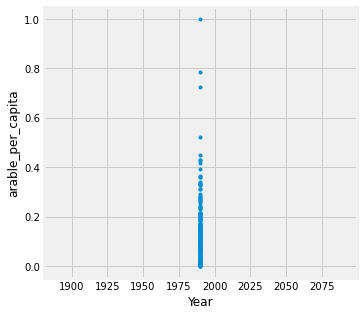

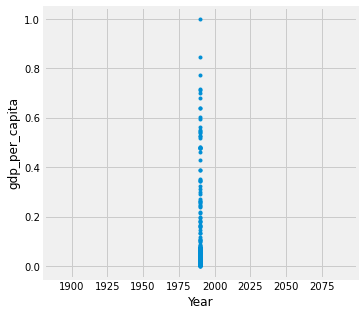

In [47]:
def makeplot(df, col1, col2):
    
    plt.figure(figsize=(5,5))
    plt.plot(df[col1], df[col2], "o", markersize=3)
    
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()
    
    
# exploratory plots
makeplot(df_norm2, "gdp_per_capita", "co2_per_capita")
makeplot(df_norm2, "gdp_per_capita", "mortality_per_1000")
makeplot(df_norm2, "gdp_per_capita", "arable_per_capita")

makeplot(df_norm2, "mortality_per_1000", "co2_per_capita")
makeplot(df_norm2, "arable_per_capita", "mortality_per_1000")
makeplot(df_norm2, "mortality_per_1000", "arable_per_capita")

makeplot(df_norm2, "Year", "co2_per_capita")
makeplot(df_norm2, "Year", "mortality_per_1000")
makeplot(df_norm2, "Year", "arable_per_capita")
makeplot(df_norm2, "Year", "gdp_per_capita")

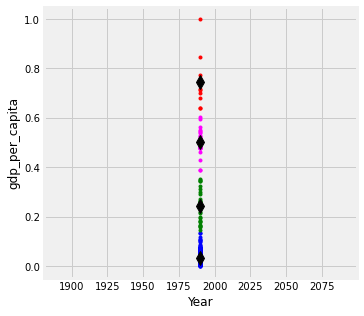

In [48]:
####### kmeans set up the clusterer, 5 expected clusters
kmeans = cluster.KMeans(n_clusters=4)

# extract columns for fitting
df_fit2 = df_norm2[["Year", "gdp_per_capita"]].copy()
kmeans.fit(df_fit2)     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))

col = ["blue", "red", "green", "magenta"]
for l in range(4):     # loop over the different labels
    plt.plot(df_fit2["Year"][labels==l], df_fit2["gdp_per_capita"][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(4):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
    
plt.xlabel("Year")
plt.ylabel("gdp_per_capita")
plt.show()

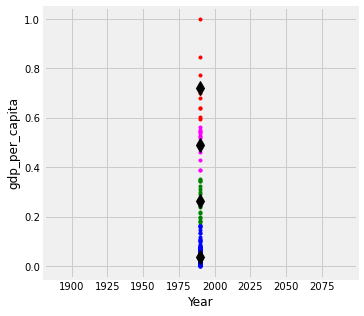

<ipython-input-49-6278a186cace>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm2["labels"] = labels


In [49]:
##### Now the agglomerative clustering for 4 clusters
ac = cluster.AgglomerativeClustering(n_clusters=4)

# carry out the fitting
ac.fit(df_fit2)

labels = ac.labels_

# The clusterer does not return cluster centres, but they are easily computed
xcen = []
ycen = []
for ic in range(4):
    xc = np.average(df_fit2["Year"][labels==ic])
    yc = np.average(df_fit2["gdp_per_capita"][labels==ic])
    xcen.append(xc)
    ycen.append(yc)

# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))

col = ["blue", "red", "green", "magenta"]
for l in range(0,4):     # loop over the different labels
    plt.plot(df_fit2["Year"][labels==l], df_fit2["gdp_per_capita"][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(4):
    plt.plot(xcen[ic], ycen[ic], "dk", markersize=10)
    
plt.xlabel("Year")
plt.ylabel("gdp_per_capita")
plt.show()


###### writing labels into df_fish, sorting and exporting as excel file
df_norm2["labels"] = labels
df_norm2 = df_norm2.sort_values(["labels"], ignore_index=True)

In [50]:
df_norm2.sample(10)

,Country Name,Year,gdp_per_capita,mortality_per_1000,co2_per_capita,arable_per_capita,labels
51,Mexico,1990,0.076357,0.121005,0.105253,0.135812,0
144,Bulgaria,1990,0.057484,0.037543,0.278471,0.232390,0
195,"Bahamas, The",1990,0.310307,0.053366,0.229280,0.016245,2
41,Low income,1990,0.007227,0.546696,0.021561,0.156254,0
31,St. Kitts and Nevis,1990,0.134165,0.075085,0.090176,0.104312,0
71,"Venezuela, RB",1990,0.060239,0.071983,0.173354,0.075676,0
53,Pre-demographic dividend,1990,0.020178,0.551479,0.014636,0.169841,0
167,IBRD only,1990,0.023226,0.222661,0.084865,0.093735,0
46,Late-demographic dividend,1990,0.024246,0.136291,0.112477,0.078729,0
117,Caribbean small states,1990,0.073448,0.088646,0.155595,0.069214,0


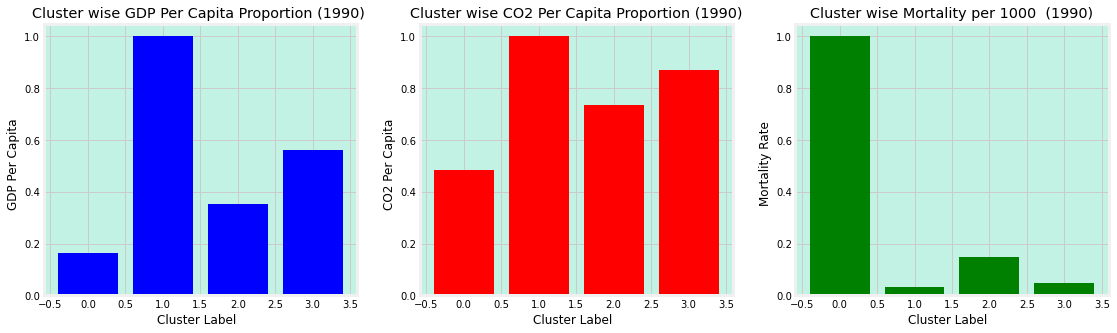

In [51]:
fig, ax = plt.subplots(1,3, figsize=(17,5))  #Setting the size of subplots


ax[0].bar(df_norm2['labels'], df_norm2['gdp_per_capita'], color='b', label='Gdp')

ax[0].set_facecolor("#c2f2e4") #Changing the background color

ax[0].set_title("Cluster wise GDP Per Capita Proportion (1990) ")
ax[0].set_xlabel("Cluster Label  ")
ax[0].set_ylabel("GDP Per Capita  ")

ax[1].bar(df_norm2['labels'], df_norm2['co2_per_capita'], color='r', label='Gdp')
ax[1].set_facecolor("#c2f2e4") #Changing the background color
ax[1].set_title("Cluster wise CO2 Per Capita Proportion (1990)")
ax[1].set_xlabel("Cluster Label  ")
ax[1].set_ylabel("CO2 Per Capita  ")

ax[2].bar(df_norm2['labels'], df_norm2['mortality_per_1000'], color='g', label='Gdp')
ax[2].set_facecolor("#c2f2e4") #Changing the background color
ax[2].set_title("Cluster wise Mortality per 1000  (1990)")
ax[2].set_xlabel("Cluster Label  ")
ax[2].set_ylabel("Mortality Rate  ")

plt.show()

## Checking the countries in clusters formed on the year 1990

In [52]:
check1= df_norm2[df_norm2['labels'] == 0]
check1.head(10)

,Country Name,Year,gdp_per_capita,mortality_per_1000,co2_per_capita,arable_per_capita,labels
0,Africa Eastern and Southern,1990,0.015218,0.491724,0.033582,0.134547,0
1,North Macedonia,1990,0.057174,0.091219,0.142022,0.127155,0
2,Mali,1990,0.005624,0.694074,0.001640,0.127580,0
3,Myanmar,1990,0.010588,0.336022,0.003346,0.121527,0
4,Middle East & North Africa (excluding high inc...,1990,0.054317,0.192388,0.076726,0.115691,0
5,Montenegro,1990,0.144517,0.031648,0.000000,0.082505,0
6,Mongolia,1990,0.027264,0.315855,0.195988,0.329645,0
7,Mozambique,1990,0.007933,0.734719,0.002846,0.139507,0
8,Mauritania,1990,0.016338,0.345641,0.013628,0.103215,0
9,Mauritius,1990,0.061018,0.051815,0.036160,0.048497,0


In [53]:
check2= df_norm2[df_norm2['labels'] == 1]
check2.head()

,Country Name,Year,gdp_per_capita,mortality_per_1000,co2_per_capita,arable_per_capita,labels
182,Luxembourg,1990,0.844547,0.007446,0.978417,0.064536,1
183,Sweden,1990,0.771867,0.002172,0.205726,0.174366,1
184,Switzerland,1990,1.000000,0.005895,0.212951,0.031437,1
185,Norway,1990,0.712374,0.007446,0.227215,0.106442,1
186,Iceland,1990,0.640042,0.000621,0.252558,0.280454,1


In [54]:
check3= df_norm2[df_norm2['labels'] == 2]
check3.head()

,Country Name,Year,gdp_per_capita,mortality_per_1000,co2_per_capita,arable_per_capita,labels
193,Iraq,1990,0.259707,0.146447,0.122872,0.150758,2
194,Kuwait,1990,0.220168,0.034750,0.460723,0.000831,2
195,"Bahamas, The",1990,0.310307,0.053366,0.229280,0.016245,2
196,Hungary,1990,0.248276,0.033819,0.214493,0.255995,2
197,Bahrain,1990,0.213447,0.051815,0.714754,0.001948,2


In [55]:
check4= df_norm2[df_norm2['labels'] == 3]
check4.head(10)

,Country Name,Year,gdp_per_capita,mortality_per_1000,co2_per_capita,arable_per_capita,labels
216,Netherlands,1990,0.536428,0.006205,0.327471,0.030740,3
217,Italy,1990,0.524657,0.010549,0.235816,0.083373,3
218,Israel,1990,0.524310,0.016444,0.239387,0.038530,3
219,Euro area,1990,0.475742,0.010172,0.278112,0.116931,3
220,Andorra,1990,0.475384,0.020788,0.248253,0.009474,3
221,Slovenia,1990,0.479843,0.012721,0.223479,0.047240,3
222,OECD members,1990,0.427277,0.048620,0.337887,0.196790,3
223,European Union,1990,0.388731,0.018469,0.279641,0.140124,3
224,High income,1990,0.475978,0.020788,0.377621,0.195360,3
225,Australia,1990,0.459303,0.008998,0.509808,0.522282,3


## Model Fitting for a single Country(i.e India)

In [56]:
## Taking help from the lecture fucntion for model fitting using the exponential function.
def exp_growth(t, scale, growth):
    """ Computes exponential function with scale and growth as free parameters
    """
    
    f = scale * np.exp(growth * (t-1950)) 
    
    return f
        



In [57]:
## Taking only the gdp per capita column for model fitting:

data= data[['Country Name','Year' , 'gdp_per_capita']]
data.head()

,Country Name,Year,gdp_per_capita
1,Africa Eastern and Southern,1960,147.507808
2,Afghanistan,1960,59.773234
3,Africa Western and Central,1960,107.932233
4,Angola,1960,1926.375416
5,Albania,1960,2338.374773


In [58]:
## Taking the values less than the year 1990 for model fitting.

india= data[(data['Country Name']== 'India') & (data['Year']<= 1990) ]
india.sample(5)

,Country Name,Year,gdp_per_capita
3567,India,1973,143.778688
907,India,1963,101.126429
2503,India,1969,107.622318
4365,India,1976,161.092092
1705,India,1966,89.997304


<ipython-input-59-2626e2423d96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india["gdp_error"] = np.sqrt(india["gdp_per_capita"])
<ipython-input-59-2626e2423d96>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india["gdp_exp"] = exp_growth(india["Year"], *popt)


Fit parameter [42.00531131  0.05575656]


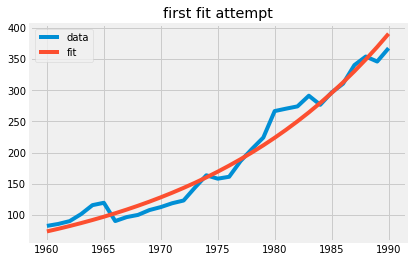

In [59]:
# calculate the error as square root of the population numbers
india["gdp_error"] = np.sqrt(india["gdp_per_capita"])

# fit exponential growth
popt, pcorr = opt.curve_fit(exp_growth, india["Year"], india["gdp_per_capita"],
                            sigma=india["gdp_error"], absolute_sigma=True)

# that did not work
print("Fit parameter", popt)
india["gdp_exp"] = exp_growth(india["Year"], *popt)
plt.figure()
plt.plot(india["Year"], india["gdp_per_capita"], label="data")
plt.plot(india["Year"], india["gdp_exp"], label="fit")

plt.legend()
plt.title("first fit attempt")
plt.show()


<ipython-input-60-a640c4b35e72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india["gdp_exp"] = exp_growth(india["Year"], *popt)


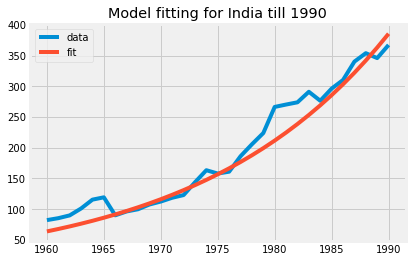

GDP Per Capita in
2000: 702.9937923115684
2010: 1280.938205528729
2020: 2334.0215864323804


In [60]:
popt = [35, 0.06]
india["gdp_exp"] = exp_growth(india["Year"], *popt)
plt.figure()
plt.plot(india["Year"], india["gdp_per_capita"], label="data")
plt.plot(india["Year"], india["gdp_exp"], label="fit")
plt.legend()
plt.title("Model fitting for India till 1990")
plt.show()

print("GDP Per Capita in")
print("2000:", exp_growth(2000, *popt)  )
print("2010:", exp_growth(2010, *popt)  )
print("2020:", exp_growth(2020, *popt)  )



## Now let's check if our model is giving correct predictions of the future.

In [61]:
## Checking values of the year 2000
india_check= data[(data['Country Name']== 'India') & (data['Year']== 2000) ]
india_check.head()

,Country Name,Year,gdp_per_capita
10749,India,2000,443.314194


In [62]:
india_check= data[(data['Country Name']== 'India') & (data['Year']== 2010) ]
india_check.head()

,Country Name,Year,gdp_per_capita
13409,India,2010,1357.563727


In [63]:
india_check= data[(data['Country Name']== 'India') & (data['Year']== 2020) ]
india_check.head()

,Country Name,Year,gdp_per_capita
16069,India,2020,1927.707823


### As we can see, our model is giving really good results, close to the values in the dataframe

## Now taking some countries from the Cluster Label 1 of the year 2020 and doing some comparisons

In [64]:
data= df_norm[df_norm['labels'] == 1]
data.head()

,Country Name,Year,gdp_per_capita,mortality_per_1000,co2_per_capita,arable_per_capita,labels
191,North America,2020,0.527728,0.010099,0.405964,0.419151,1
192,Israel,2020,0.379440,0.039800,0.149358,0.038950,1
193,Japan,2020,0.345101,0.018763,0.172693,0.021109,1
194,Singapore,2020,0.514433,0.030676,0.193298,0.000000,1
195,Netherlands,2020,0.450510,0.016940,0.219244,0.031944,1


In [65]:
##Removing unncessary rows which are not the column names

list= ['OECD members', 'High income', 'Post-demographic dividend', 'Euro area', 'North America']
data = data[~data['Country Name'].isin(list)]

<ipython-input-66-21ad588ada7c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(data['Country Name'], rotation=90)
<ipython-input-66-21ad588ada7c>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(data['Country Name'], rotation=90)


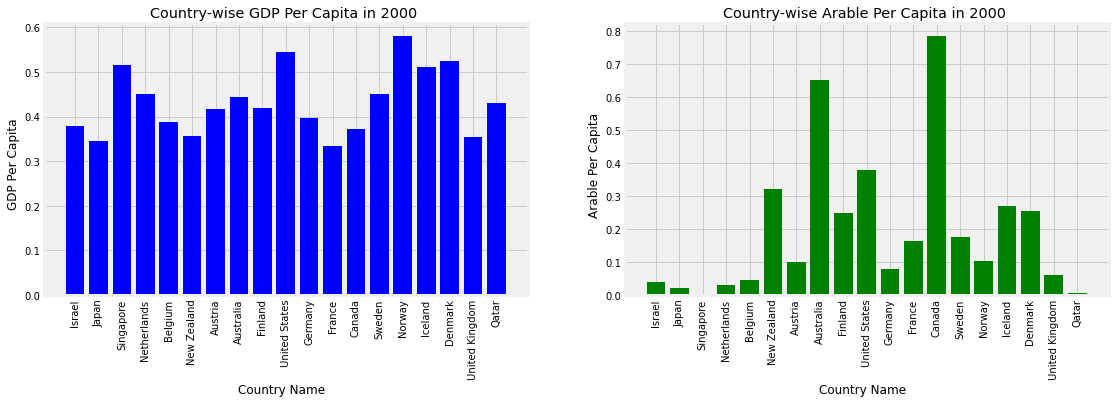

In [66]:
fig, ax = plt.subplots(1,2, figsize=(17,5))  #Setting the size of subplots


ax[0].bar(data['Country Name'], data['gdp_per_capita'], color='b', label='Gdp')


ax[0].set_title("Country-wise GDP Per Capita in 2000 ")
ax[0].set_xlabel("Country Name  ")
ax[0].set_ylabel("GDP Per Capita  ")
ax[0].set_xticklabels(data['Country Name'], rotation=90)

ax[1].bar(data['Country Name'], data['arable_per_capita'], color='g', label='mortality')


ax[1].set_title("Country-wise Arable Per Capita in 2000 ")
ax[1].set_xlabel("Country Name  ")
ax[1].set_ylabel("Arable Per Capita   ")
ax[1].set_xticklabels(data['Country Name'], rotation=90)

plt.show()

<ipython-input-67-cafd227fd87c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(data['Country Name'], rotation=90)
<ipython-input-67-cafd227fd87c>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(data['Country Name'], rotation=90)


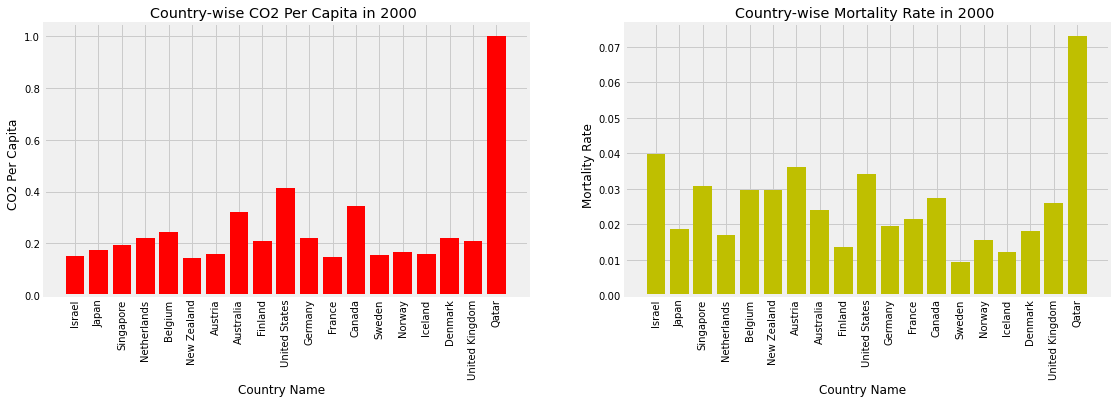

In [67]:
fig, ax = plt.subplots(1,2, figsize=(17,5))  #Setting the size of subplots


ax[0].bar(data['Country Name'], data['co2_per_capita'], color='r', label='co2')


ax[0].set_title("Country-wise CO2 Per Capita in 2000 ")
ax[0].set_xlabel("Country Name  ")
ax[0].set_ylabel("CO2 Per Capita  ")
ax[0].set_xticklabels(data['Country Name'], rotation=90)


ax[1].bar(data['Country Name'], data['mortality_per_1000'], color='y', label='mortality')


ax[1].set_title("Country-wise Mortality Rate in 2000 ")
ax[1].set_xlabel("Country Name  ")
ax[1].set_ylabel("Mortality Rate   ")
ax[1].set_xticklabels(data['Country Name'], rotation=90)


plt.show()

In [68]:
data.corr()

,Year,gdp_per_capita,mortality_per_1000,co2_per_capita,arable_per_capita,labels
Year,NaN,NaN,NaN,NaN,NaN,NaN
gdp_per_capita,NaN,1.000000,-0.134884,0.079062,0.029826,NaN
mortality_per_1000,NaN,-0.134884,1.000000,0.795080,-0.159027,NaN
co2_per_capita,NaN,0.079062,0.795080,1.000000,0.039134,NaN
arable_per_capita,NaN,0.029826,-0.159027,0.039134,1.000000,NaN
labels,NaN,NaN,NaN,NaN,NaN,NaN
